### For each village, find the nearest city

In [1]:
import pandas as pd
import numpy as np

from utils import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

(a) village_coords_414 (keep villageid in output file) AND mc_coords_v2_june2017 

In [2]:
a = find_closest("village_coords_414.csv", "mc_coords_v2_june2017.csv")
a.to_csv("output/village_coords_414_mc_coords_tn_june2017.csv", index=False)
a.sample(n=5)

,villageid,latitude,longitude,city_index,distance,city,state
146,147,27.70634,78.08231,191,19.245675,ALIGARH,UTTAR PRADESH
40,41,19.04735,73.95509,151,49.036032,Pimpri-Chinchwad,MAHARASHTRA
57,58,20.82350,71.04086,53,97.269961,JUNAGADH,GUJARAT
229,231,11.02904,79.85069,187,82.401679,THANJAVUR,TAMIL NADU
41,42,21.23389,77.73949,124,34.211576,AMRAVATI,MAHARASHTRA


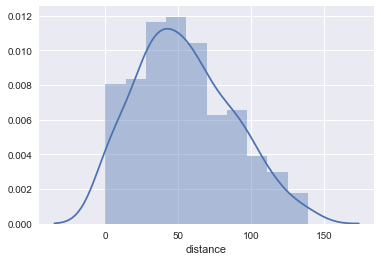

In [3]:
sns.distplot(a.distance)

Repeat this for (b) village_list_tndata_coords_small AND mc_coords_tn_june2017 

In [4]:
b = find_closest("village_list_tndata_coords_small.csv", "mc_coords_tn_june2017.csv")
b.to_csv("output/village_list_tndata_coords_small_mc_coords_tn_june2017.csv", index=False)
b.sample(n=5)

,district,tehsil,psu,SUB_DISTRI,longitude,latitude,city_index,distance,city,state
52,Dharmapuri,Hosur,55,Hosur,77.936034,12.710540,24,49.097070,BANGALORE,KARNATAKA
1,Thiruvallur,Gummidipoondi,3,Gummidipoondi,80.068823,13.418958,53,42.748190,CHENNAI,TAMIL NADU
169,Virudhunagar,Kariapatti,184,Kariapatti,78.127092,9.655284,56,27.229876,MADURAI,TAMIL NADU
80,Viluppuram,Kallakkurichi,84,Kallakkurichi,78.961906,11.679734,58,87.497869,SALEM,TAMIL NADU
154,Pudukkottai,Alangudi,160,Alangudi,79.038869,10.386006,64,45.657603,THANJAVUR,TAMIL NADU


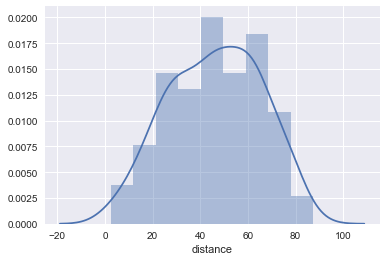

In [5]:
sns.distplot(b.distance)

In [6]:
c = find_closest("village_list_tndata_coords_small.csv", "pop100plus_coords_tn_june2017.csv")
c.to_csv("output/village_list_tndata_coords_small_pop100plus_coords_tn_june2017.csv", index=False)
c.head()

,district,tehsil,psu,SUB_DISTRI,longitude,latitude,city_index,distance,city,state
0,Thiruvallur,Thiruvallur,1,Thiruvallur,79.897859,13.122751,68,38.252366,KANCHIPURAM,TAMIL NADU
1,Thiruvallur,Gummidipoondi,3,Gummidipoondi,80.068823,13.418958,53,42.748190,CHENNAI,TAMIL NADU
2,Thiruvallur,Thiruvallur,4,Thiruvallur,79.897859,13.122751,68,38.252366,KANCHIPURAM,TAMIL NADU
3,Thiruvallur,Thiruvallur,5,Thiruvallur,79.897859,13.122751,68,38.252366,KANCHIPURAM,TAMIL NADU
4,Kancheepuram,Maduranthakam,6,Maduranthakam,79.841055,12.462654,68,43.727371,KANCHIPURAM,TAMIL NADU


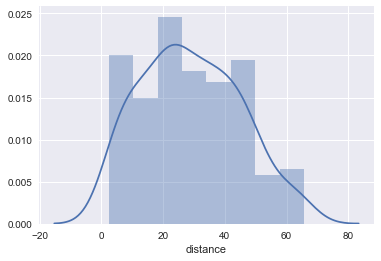

In [7]:
sns.distplot(c.distance)

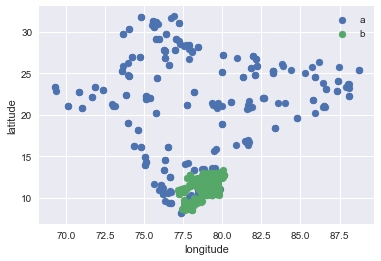

In [8]:
plt.scatter(a.longitude, a.latitude, label="a")
plt.scatter(b.longitude, b.latitude, label="b")
plt.legend()
plt.ylabel("latitude")
plt.xlabel("longitude")

In [9]:
b.query("psu == 167")

,district,tehsil,psu,SUB_DISTRI,longitude,latitude,city_index,distance,city,state
160,Sivaganga,Tirupathur,167,Tirupathur,78.567559,11.36906,58,54.246971,SALEM,TAMIL NADU


In [10]:
c.query("psu == 167")

,district,tehsil,psu,SUB_DISTRI,longitude,latitude,city_index,distance,city,state
160,Sivaganga,Tirupathur,167,Tirupathur,78.567559,11.36906,58,54.246971,SALEM,TAMIL NADU


Since the cities in c are a superset of the cities in b, the distances in c should be less than or equal to those in b. Verify:

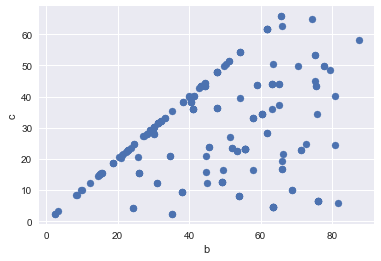

In [11]:
df_comparo = pd.merge(b[["psu", "distance"]],
                      c[["psu", "distance"]],
                      "inner", "psu", 
                      suffixes=["_b", "_c"])
plt.scatter(df_comparo.distance_b, df_comparo.distance_c)
plt.xlabel("b")
plt.ylabel("c")

In [12]:
assert (df_comparo["distance_c"] <= df_comparo["distance_b"]).all()